# Визуализация метода моментов. 
В качестве поверхности функции потерь мы будем использовать $L(x,y) = a*x^2+b*y^2$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [5]:
class LossSurface:
    def __init__(self,a,b,N = 1000):
        self.a = a
        self.b = b
        x_list = np.linspace(-2.5,2.5,N)
        y_list = np.linspace(-0.5,0.5,N)
        self.x,self.y = np.meshgrid(x_list,y_list)
        self.z = self.a*(self.x**2) + self.b*(self.y**2)
    
    def plot(self):
        fig,ax = plt.subplots()
        cmap = cm.get_cmap('Greens_r')
        cp = ax.contour(self.x,self.y,self.z,50,cmap = cmap)
        cbar = fig.colorbar(cp)
        cbar.set_label('loss')
        ax.set_xlim(-2.5, 2.5)
        ax.set_ylim(-0.5, 0.5)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        return fig, ax
        

In [36]:
class Momentum:
    def __init__(self, lr, iteration, beta, loss_surface):
        self.lr = lr
        self.iteration = iteration
        self.beta = beta
        self.a = loss_surface.a
        self.b = loss_surface.b
        self.w_1, self.w_2, self.v_1, self.v_2 = self.init_parameters()

    def run(self):
        w_1_curve = []
        w_2_curve = []
        v_1_curve = []
        v_2_curve = []
        w_1_curve.append(self.w_1)
        w_2_curve.append(self.w_2)
        v_1_curve.append(self.v_1)
        v_2_curve.append(self.v_2)

        for step in range(self.iteration):
            self.gd_update()
            loss = self.calculate_loss()
            w_1_curve.append(self.w_1)
            w_2_curve.append(self.w_2)
            v_1_curve.append(self.v_1)
            v_2_curve.append(self.v_2)

            print('iteration: {}, w1: {}, w2: {}, v1: {}, v2:{}, loss: {}'.format(
                  step+1, self.w_1, self.w_2, self.v_1, self.v_2, loss))
        return w_1_curve, w_2_curve, v_1_curve, v_2_curve

    def gd_update(self):
        self.v_1 = self.beta * self.v_1 + 2 * self.lr * self.a * self.w_1
        self.w_1 -=  self.v_1
        self.v_2 = self.beta * self.v_2 + 2 *  self.lr *  self.b * self.w_2
        self.w_2 -=  self.v_2

    def calculate_loss(self):
        loss = self.a * self.w_1**2 + self.b * self.w_2**2
        return loss

    def save_plot(self, loss_surface_fig, loss_surface_ax, w_1_curve, w_2_curve):
        loss_surface_ax.plot(w_1_curve, w_2_curve, color="black")

        fig_name = 'sgd_beta_{}_lr_{}_iter_{}_with_contour.png'.format(self.beta, self.lr, self.iteration)
        loss_surface_fig.savefig(fig_name)

        print('{} saved.'.format(fig_name))

    @staticmethod
    def init_parameters():
        w_1 = -2.4
        w_2 = 0.2
        v_1 = 0
        v_2 = 0

        return w_1, w_2, v_1, v_2
 

def save_velocity_plot(name, v_curves):
    fig, ax = plt.subplots()
    ax.plot(v_curves['beta_0.0'], label='beta=0.0')
    ax.plot(v_curves['beta_0.8'], label='beta=0.8')
    ax.plot(v_curves['beta_0.9'], label='beta=0.9')
    ax.legend()
    ax.set_xlabel('iterations')
    ax.set_ylabel('velocity')
    fig_name = 'velocity_{}.png'.format(name)
    fig.savefig(fig_name)
    print('{} saved.'.format(fig_name))     
        
            

In [37]:
import collections

iteration: 1, w1: -2.37, w2: -0.16000000000000003, v1: -0.03, v2:0.36000000000000004, loss: 0.5814562500000001
iteration: 2, w1: -2.3403750000000003, w2: 0.12800000000000006, v1: -0.029625000000000002, v2:-0.2880000000000001, loss: 0.48979069628906274
iteration: 3, w1: -2.3111203125000004, w2: -0.10240000000000005, v1: -0.029254687500000005, v2:0.2304000000000001, loss: 0.4282016586781313
iteration: 4, w1: -2.2822313085937505, w2: 0.08192000000000005, v1: -0.028889003906250005, v2:-0.1843200000000001, loss: 0.3859342117203465
iteration: 5, w1: -2.2537034172363284, w2: -0.06553600000000004, v1: -0.028527891357421883, v2:0.1474560000000001, loss: 0.35610339896791904
iteration: 6, w1: -2.2255321245208743, w2: 0.05242880000000004, v1: -0.028171292715454106, v2:-0.11796480000000008, loss: 0.33430108895460986
iteration: 7, w1: -2.1977129729643634, w2: -0.04194304000000003, v1: -0.02781915155651093, v2:0.09437184000000007, loss: 0.31770436191096574
iteration: 8, w1: -2.170241560802309, w2: 0.

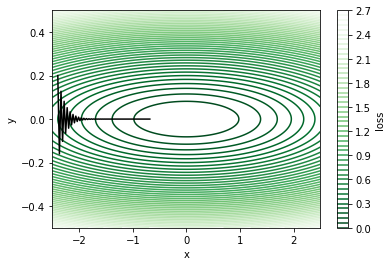

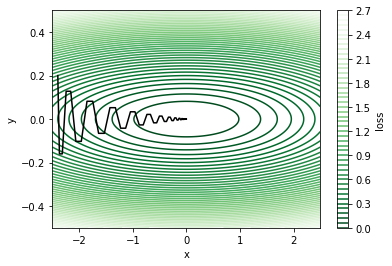

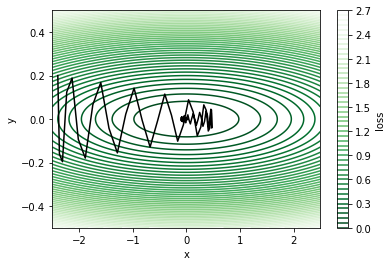

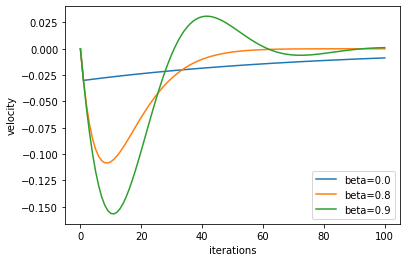

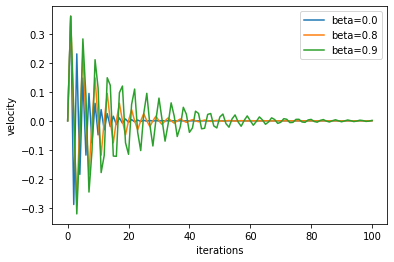

In [74]:
lr = 0.1
iteration = 100
v_1_curves = collections.defaultdict(list)
v_2_curves = collections.defaultdict(list)
for beta in [0.0, 0.8, 0.9]:
    a = 1 / 16
    b = 9
    ls = LossSurface(a, b)
    ls_fig, ls_ax = ls.plot()
    demo = Momentum(lr=lr, iteration=iteration, beta=beta, loss_surface=ls)
    w_1_curve, w_2_curve, v_1_curve, v_2_curve = demo.run()
    demo.save_plot(ls_fig, ls_ax, w_1_curve, w_2_curve)
    v_1_curves['beta_{}'.format(beta)] = v_1_curve
    v_2_curves['beta_{}'.format(beta)] = v_2_curve
save_velocity_plot('v_1', v_1_curves)
save_velocity_plot('v_2', v_2_curves)

In [46]:
class GradientDescend:
    def __init__(self, lr, iteration, beta, loss_surface):
        self.lr = lr
        self.iteration = iteration
        self.beta = beta
        self.a = loss_surface.a
        self.b = loss_surface.b
        self.w_1, self.w_2 = self.init_parameters()

    def run(self):
        w_1_curve = []
        w_2_curve = []
        w_1_curve.append(self.w_1)
        w_2_curve.append(self.w_2)

        for step in range(self.iteration):
            self.gd_update()
            loss = self.calculate_loss()
            w_1_curve.append(self.w_1)
            w_2_curve.append(self.w_2)

            print('iteration: {}, w1: {}, w2: {}, v1: {}, v2:{}, loss: {}'.format(
                  step+1, self.w_1, self.w_2, self.v_1, self.v_2, loss))
        return w_1_curve, w_2_curve

    def gd_update(self):
        self.v_1 =  2 * self.lr * self.a * self.w_1
        self.w_1 -=  self.v_1
        self.v_2 = 2 *  self.lr *  self.b * self.w_2
        self.w_2 -=  self.v_2

    def calculate_loss(self):
        loss = self.a * self.w_1**2 + self.b * self.w_2**2
        return loss

    def save_plot(self, loss_surface_fig, loss_surface_ax, w_1_curve, w_2_curve):
        loss_surface_ax.plot(w_1_curve, w_2_curve, color="black")

        fig_name = 'gd_beta_{}_lr_{}_iter_{}_with_contour.png'.format(self.beta, self.lr, self.iteration)
        loss_surface_fig.savefig(fig_name)

        print('{} saved.'.format(fig_name))

    @staticmethod
    def init_parameters():
        w_1 = -2.4
        w_2 = 0.2

        return w_1, w_2
 


iteration: 1, w1: -2.37, w2: -0.16000000000000003, v1: -0.03, v2:0.36000000000000004, loss: 0.5814562500000001
iteration: 2, w1: -2.3403750000000003, w2: 0.12800000000000006, v1: -0.029625000000000002, v2:-0.2880000000000001, loss: 0.48979069628906274
iteration: 3, w1: -2.3111203125000004, w2: -0.10240000000000005, v1: -0.029254687500000005, v2:0.2304000000000001, loss: 0.4282016586781313
iteration: 4, w1: -2.2822313085937505, w2: 0.08192000000000005, v1: -0.028889003906250005, v2:-0.1843200000000001, loss: 0.3859342117203465
iteration: 5, w1: -2.2537034172363284, w2: -0.06553600000000004, v1: -0.028527891357421883, v2:0.1474560000000001, loss: 0.35610339896791904
iteration: 6, w1: -2.2255321245208743, w2: 0.05242880000000004, v1: -0.028171292715454106, v2:-0.11796480000000008, loss: 0.33430108895460986
iteration: 7, w1: -2.1977129729643634, w2: -0.04194304000000003, v1: -0.02781915155651093, v2:0.09437184000000007, loss: 0.31770436191096574
iteration: 8, w1: -2.170241560802309, w2: 0.

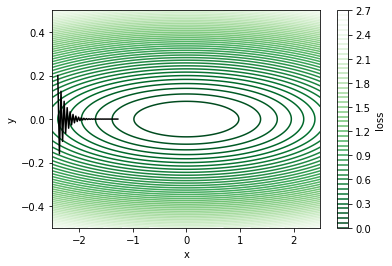

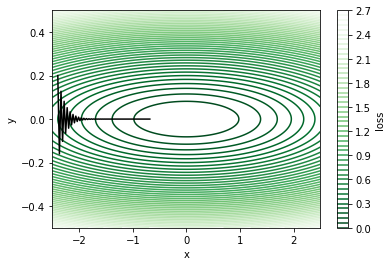

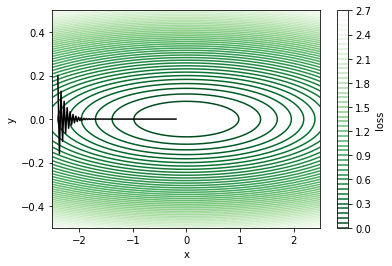

In [50]:
lr = 0.1
for iteration in [50,100,200]:
    a = 1 / 16
    b = 9
    ls = LossSurface(a, b)
    ls_fig, ls_ax = ls.plot()
    demo = GradientDescend(lr=lr, iteration=iteration, beta=beta, loss_surface=ls)
    w_1_curve, w_2_curve = demo.run()
    demo.save_plot(ls_fig, ls_ax, w_1_curve, w_2_curve)

In [69]:
class NesterovGD:
    def __init__(self, lr, iteration, beta, loss_surface):
        self.lr = lr
        self.iteration = iteration
        self.beta = beta
        self.a = loss_surface.a
        self.b = loss_surface.b
        self.w_1, self.w_2, self.v_1, self.v_2 = self.init_parameters()

    def run(self):
        w_1_curve = []
        w_2_curve = []
        v_1_curve = []
        v_2_curve = []
        w_1_curve.append(self.w_1)
        w_2_curve.append(self.w_2)
        v_1_curve.append(self.v_1)
        v_2_curve.append(self.v_2)

        for step in range(self.iteration):
            self.gd_update()
            loss = self.calculate_loss()
            w_1_curve.append(self.w_1)
            w_2_curve.append(self.w_2)
            v_1_curve.append(self.v_1)
            v_2_curve.append(self.v_2)

            print('iteration: {}, w1: {}, w2: {}, v1: {}, v2:{}, loss: {}'.format(
                  step+1, self.w_1, self.w_2, self.v_1, self.v_2, loss))
        return w_1_curve, w_2_curve, v_1_curve, v_2_curve

    def gd_update(self):
        w_temp_1 = self.w_1 - self.beta * self.v_1
        self.w_1 = w_temp_1 - 2 * self.lr * self.a * w_temp_1
        self.v_1 = self.beta * self.v_1  + 2 * self.lr * self.a * w_temp_1
        w_temp_2 = self.w_2 - self.beta * self.v_2
        self.w_2 = w_temp_2 - 2 * self.lr * self.a*w_temp_2
        self.v_2 = self.beta * self.v_2  + 2 * self.lr * self.a * w_temp_2

    def calculate_loss(self):
        loss = self.a * self.w_1**2 + self.b * self.w_2**2
        return loss

    def save_plot(self, loss_surface_fig, loss_surface_ax, w_1_curve, w_2_curve):
        loss_surface_ax.plot(w_1_curve, w_2_curve, color="black")

        fig_name = 'sgd_beta_{}_lr_{}_iter_{}_with_contour.png'.format(self.beta, self.lr, self.iteration)
        loss_surface_fig.savefig(fig_name)

        print('{} saved.'.format(fig_name))

    @staticmethod
    def init_parameters():
        w_1 = -2.4
        w_2 = 0.2
        v_1 = 0
        v_2 = 0

        return w_1, w_2, v_1, v_2
 

def save_velocity_plot(name, v_curves):
    fig, ax = plt.subplots()
    ax.plot(v_curves['beta_0.0'], label='beta=0.0')
    ax.plot(v_curves['beta_0.8'], label='beta=0.8')
    ax.plot(v_curves['beta_0.9'], label='beta=0.9')
    ax.legend()
    ax.set_xlabel('iterations')
    ax.set_ylabel('velocity')
    fig_name = 'velocity_{}.png'.format(name)
    fig.savefig(fig_name)
    print('{} saved.'.format(fig_name))     
        
            

iteration: 1, w1: -2.37, w2: 0.1975, v1: -0.03, v2:0.0025000000000000005, loss: 0.7021125000000001
iteration: 2, w1: -2.3403750000000003, w2: 0.19503125000000002, v1: -0.029625000000000002, v2:0.0024687500000000005, loss: 0.6846693925781251
iteration: 3, w1: -2.3111203125000004, w2: 0.19259335937500002, v1: -0.029254687500000005, v2:0.0024378906250000004, loss: 0.6676596373562624
iteration: 4, w1: -2.2822313085937505, w2: 0.19018594238281253, v1: -0.028889003906250005, v2:0.0024074169921875005, loss: 0.6510724682406928
iteration: 5, w1: -2.2537034172363284, w2: 0.18780861810302737, v1: -0.028527891357421883, v2:0.002377324279785157, loss: 0.634897386607838
iteration: 6, w1: -2.2255321245208743, w2: 0.18546101037673954, v1: -0.028171292715454106, v2:0.002347607726287842, loss: 0.6191241546592996
iteration: 7, w1: -2.1977129729643634, w2: 0.1831427477470303, v1: -0.02781915155651093, v2:0.002318262629709244, loss: 0.6037427889419826
iteration: 8, w1: -2.170241560802309, w2: 0.18085346340

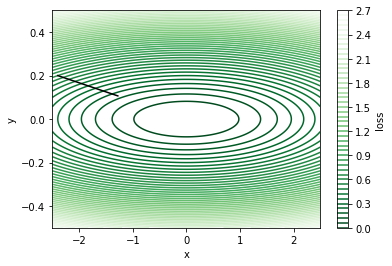

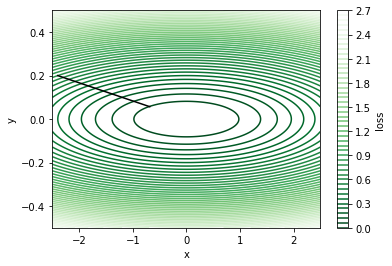

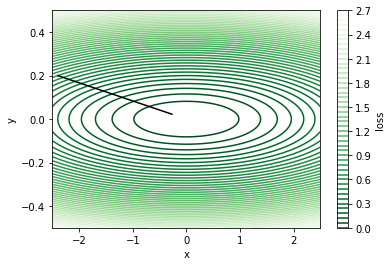

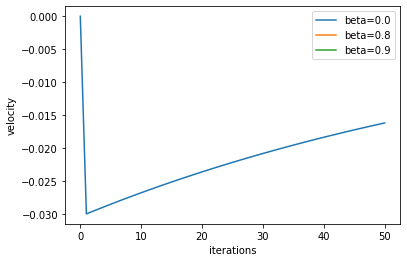

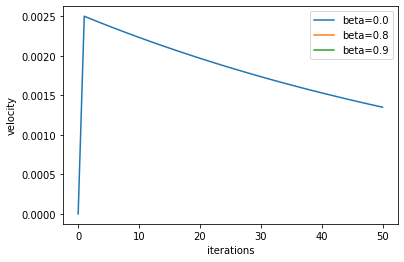

In [75]:
lr = 0.1
iteration = 50
v_1_curves = collections.defaultdict(list)
v_2_curves = collections.defaultdict(list)
for beta in [0.0, 0.5, 0.7]:
    a = 1 / 16
    b = 9
    ls = LossSurface(a, b)
    ls_fig, ls_ax = ls.plot()
    demo = NesterovGD(lr=lr, iteration=iteration, beta=beta, loss_surface=ls)
    w_1_curve, w_2_curve, v_1_curve, v_2_curve = demo.run()
    demo.save_plot(ls_fig, ls_ax, w_1_curve, w_2_curve)
    v_1_curves['beta_{}'.format(beta)] = v_1_curve
    v_2_curves['beta_{}'.format(beta)] = v_2_curve
save_velocity_plot('v_1', v_1_curves)
save_velocity_plot('v_2', v_2_curves)